<a href="https://colab.research.google.com/github/NikolaZubic/AppliedGameTheoryHomeworkSolutions/blob/main/domaci2_osnovni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DRUGI OSNOVNI DOMAĆI ZADATAK iz predmeta "Primenjena teorija igara" (Applied Game Theory)


Pronalaženje najkraćeg (najisplativijeg) puta u usmjerenom težinskom grafu za dati ulazni čvor i skup izlaznih čvorova.

# Potrebni import-i

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from operator import itemgetter
from itertools import groupby

# Pomoćne funkcije

In [ ]:
def graph_from_adj_list(A):
    """
    :param A: given adjacency list
    :return: networkX graph object
    """
    nodes_labels = {1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F'}

    g = nx.DiGraph()

    for i in range(6):  # A B C D E F
        for j in range(6):
            if A[i][j] == 1:
                g.add_edge(i + 1, j + 1, color='black', width=1)

    g = nx.relabel_nodes(g, nodes_labels)

    return g

In [ ]:
def draw_graph(g):
    """
    Draws networkX graph object using matplotlib.pyplot.
    :param g: networkX graph object
    :return: None
    """
    pos = nx.shell_layout(g)
    colors = [g[u][v]['color'] for u, v in g.edges]
    width = [g[u][v]['width'] for u, v in g.edges]

    nx.draw(g, pos, with_labels=True, connectionstyle='arc3, rad = 0.1', edge_color=colors, width=width)
    edge_labels = dict([((u, v,), d['weight'])
                        for u, v, d in g.edges(data=True)])
    nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, label_pos=0.3, font_size=7)

    nx.draw_networkx_nodes(g, pos=pos)
    plt.show()

In [ ]:
def draw_best_path(g):
    """
    Draws best path with red line in a given input graph.
    :param g: networkX graph object
    :return: None
    """
    for i in range(len(best_path) - 1):
        g.get_edge_data(best_path[i], best_path[i + 1])['color'] = "red"
        g.get_edge_data(best_path[i], best_path[i + 1])['width'] = 4
    draw_graph(g)

In [ ]:
def initialize_graph_structure_and_add_weights(g):
    """
    Initialize graph structure with some weights in format:
    {'A': {'node_connected_with_a': weight_value_1, 'C': weight_value_2}, 'B': {'node_connected_with_B': weight_value_3},
     'C': {} ...}

    :param g: networkX graph object
    :return: graph structure and g object
    """
    graph_structure = dict((k, {v[1]: 0 for v in itr}) for k, itr in groupby(g.edges, itemgetter(0)))
    graph_structure.update({"C": {}})

    graph_structure["A"]["B"], g["A"]["B"]['weight'] = -1, -1
    graph_structure["A"]["C"], g["A"]["C"]['weight'] = 4, 4
    graph_structure["B"]["C"], g["B"]["C"]['weight'] = 3, 3
    graph_structure["B"]["D"], g["B"]["D"]['weight'] = 2, 2
    graph_structure["B"]["E"], g["B"]["E"]['weight'] = 2, 2
    graph_structure["D"]["B"], g["D"]["B"]['weight'] = 1, 1
    graph_structure["D"]["C"], g["D"]["C"]['weight'] = 5, 5
    graph_structure["D"]["F"], g["D"]["F"]['weight'] = 2, 2
    graph_structure["E"]["D"], g["E"]["D"]['weight'] = -3, -3
    graph_structure["E"]["F"], g["E"]["F"]['weight'] = -2, -2
    graph_structure["F"]["B"], g["F"]["B"]['weight'] = 1, 1

    return graph_structure, g

# Bellman-Ford algorithm

In [ ]:
def bellman_ford(A, source):
    """
    Implementation of the Bellman-Ford algorithm. This algorithm computes shortest paths from a single source vertex to
    all of the other vertices in a weighted digraph.
    :param A: adjacency matrix
    :param source: source vertex
    :return: list of distances from source vertex and predecessors information and graph object
    """

    # Create networkX graph object from adjacency list
    g = graph_from_adj_list(A)

    # Initialize graph structure and weights for graph
    graph_structure, g = initialize_graph_structure_and_add_weights(g)

    # Draw input graph
    draw_graph(g)

    # Initialize distances and predecessors lists
    distance, predecessor = {}, {}
    for vertex in g.nodes:
        if vertex is source:
            distance[vertex] = 0
        else:
            distance[vertex] = np.inf
        predecessor[vertex] = None

    # Relax edges repeatedly
    for i in range(len(g.nodes) - 1):
        for edge in g.edges:
            w = graph_structure[edge[0]][edge[1]]
            if distance[edge[0]] + w < distance[edge[1]]:
                distance[edge[1]] = distance[edge[0]] + w
                predecessor[edge[1]] = edge[0]

    # Check if there are negative-weight cycles
    for edge in g.edges:
        w = graph_structure[edge[0]][edge[1]]
        if distance[edge[0]] + w < distance[edge[1]]:
            print("Graph contains a negative-weight cycle")
            return -1

    return distance, predecessor, g

# Main function for shortest (most cost effective) path

In [ ]:
def shortest_path(A, source, end_nodes):
    """
    Finds the shortest path from source node to given end nodes of graph.
    :param A: adjacency matrix
    :param source: source node
    :param end_nodes: list of end nodes
    :return: shortest path output result
    """

    distance, predecessor, g = bellman_ford(A, source=source)

    best_path, best_path_value = None, np.inf

    for path_nodes in nx.all_simple_paths(g, source='A', target=end_nodes):
        current_path_value = 0

        for i in range(len(path_nodes) - 1):
            current_path_value += distance[path_nodes[i]]
            current_path_value += g.get_edge_data(path_nodes[i], path_nodes[i + 1])['weight']

        if current_path_value < best_path_value:
            best_path_value = current_path_value
            best_path = path_nodes

    return best_path, best_path_value, g

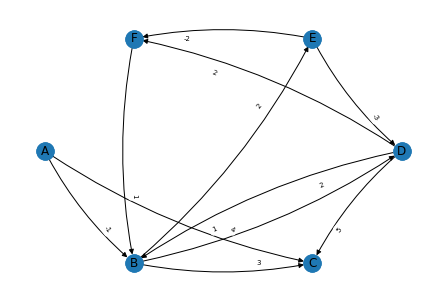

Best path: ['A', 'B', 'E', 'D'], value:-2


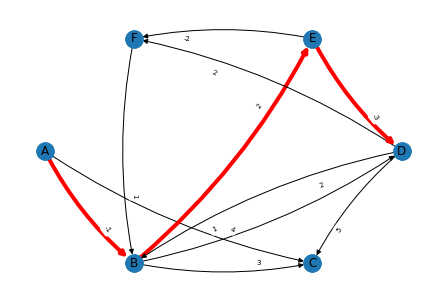

In [ ]:
A = [
        [0, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 1],
        [0, 0, 0, 1, 0, 1],
        [0, 1, 0, 0, 0, 0]
    ]

best_path, best_path_value, g = shortest_path(A, source="A", end_nodes=["B", "C", "D", "E", "F"])

print("Best path: " + str(best_path) + ", value:" + str(best_path_value))
draw_best_path(g)
